# Premier League 17/18 season data analysis
---

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
print(pd.__version__)
print(sns.__version__)

0.23.3
0.9.0


In [3]:
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
from pylab import rcParams

In [56]:
sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20
# rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

In [6]:
premier_league_df = pd.read_csv("epldata_final.csv")
pl_1718_table_df = pd.read_excel("premier_league_17_18_table.xlsx", index_col="Pos")

## Preprocess the datasets
---
Before analytics, a data preparation need to be done.

### Normalise the column names
Since two datasets have different column names, first step is to make the naming convention consistent.

We will follow two rules for clarity:
1. Lower case
2. Full name

In [7]:
pl_1718_table_df.columns = ["club", "played", "won", "drawn", "lost", "goals", "goals against", "goal difference", "points"]
pl_1718_table_df.head(3)

,club,played,won,drawn,lost,goals,goals against,goal difference,points
Pos,,,,,,,,,
1,Manchester City,38,32,4,2,106,27,79,100
2,Manchester United,38,25,6,7,68,28,40,81
3,Tottenham Hotspur,38,23,8,7,74,36,38,77


Firstly, drop the redundant columns: "club id" and "age category"

In [8]:
premier_league_df.drop(["age_cat", "club_id"], axis=1, inplace=True)

This data set we will remove all the underscores

In [9]:
premier_league_df.columns = ["name", "club","age", "position",
                             "position category", "market value(Mill)", 
                             "wiki views(daily)", "fpl value", "fpl select(%)", 
                             "fpl points", "region category", "nationality", 
                             "new foreign", "big club", "new signing"]
premier_league_df.head(3)

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,nationality,new foreign,big club,new signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,1,0


In [10]:
premier_league_df["club"].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

### Change numeric value to meaningful string 
As this project is for exploratory data analysis only, meaningful string will be more intuitively than numeric code

In [11]:
# First to check if anyother category exist
premier_league_df["position category"].unique()

array([1, 4, 3, 2])

In [12]:
def change_position_cat_to_string(x):
    if type(x) == str:
        return x
    switcher = {
        1: "attackers",
        2: "midfielders",
        3: "defenders",
        4: "goalkeepers"
    }
    
    return switcher.get(x, "Invalid category")

In [13]:
premier_league_df["position category"] = premier_league_df["position category"].apply(change_position_cat_to_string)

In [14]:
premier_league_df.head()

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,nationality,new foreign,big club,new signing
0,Alexis Sanchez,Arsenal,28,LW,attackers,65.0,4329,12.0,17.10%,264,3.0,Chile,0,1,0
1,Mesut Ozil,Arsenal,28,AM,attackers,50.0,4395,9.5,5.60%,167,2.0,Germany,0,1,0
2,Petr Cech,Arsenal,35,GK,goalkeepers,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,1,0
3,Theo Walcott,Arsenal,28,RW,attackers,20.0,2393,7.5,1.50%,122,1.0,England,0,1,0
4,Laurent Koscielny,Arsenal,31,CB,defenders,22.0,912,6.0,0.70%,121,2.0,France,0,1,0


In [15]:
premier_league_df["region category"].unique()

array([ 3.,  2.,  1.,  4., nan])

We can see that there are invalid value inside "region category" column. Next we want to locate those value can change them to consitent value.

In [16]:
# TODO: Ask Teo, seems chain assignment doesn't work
idx = premier_league_df[premier_league_df["region category"].isnull()].index
premier_league_df[premier_league_df["region category"].isnull()]

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,nationality,new foreign,big club,new signing
188,Steve Mounie,Huddersfield,22,CF,attackers,5.5,56,6.0,0.60%,0,NaN,Benin,0,0,0


In [17]:
_ = premier_league_df.set_value(index=idx, col="region category", value= 4)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [18]:
def change_region_cat_to_string(x):
    if type(x) == str:
        return x
    switcher = {
        1: "England",
        2: "EU",
        3: "Americas",
        4: "Rest of World"
    }
    
    return switcher.get(x, "Invalid category")

In [19]:
premier_league_df["region category"] = premier_league_df["region category"].apply(change_region_cat_to_string)

In [20]:
premier_league_df.head(3)

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,nationality,new foreign,big club,new signing
0,Alexis Sanchez,Arsenal,28,LW,attackers,65.0,4329,12.0,17.10%,264,Americas,Chile,0,1,0
1,Mesut Ozil,Arsenal,28,AM,attackers,50.0,4395,9.5,5.60%,167,EU,Germany,0,1,0
2,Petr Cech,Arsenal,35,GK,goalkeepers,7.0,1529,5.5,5.90%,134,EU,Czech Republic,0,1,0


In [21]:
premier_league_df["big club"] = premier_league_df["big club"].apply(lambda x: True if x == 1 else False)
premier_league_df["new foreign"] = premier_league_df["new foreign"].apply(lambda x: True if x == 1 else False)
premier_league_df["new signing"] = premier_league_df["new signing"].apply(lambda x: True if x == 1 else False)
premier_league_df.head(3)

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,nationality,new foreign,big club,new signing
0,Alexis Sanchez,Arsenal,28,LW,attackers,65.0,4329,12.0,17.10%,264,Americas,Chile,False,True,False
1,Mesut Ozil,Arsenal,28,AM,attackers,50.0,4395,9.5,5.60%,167,EU,Germany,False,True,False
2,Petr Cech,Arsenal,35,GK,goalkeepers,7.0,1529,5.5,5.90%,134,EU,Czech Republic,False,True,False


### Change "new signing" column values
The original data set column "new foreign" doesn't count as new signing which doesn't make sense.

In [22]:
premier_league_df["new signing"] = (premier_league_df["new signing"] == True) | (premier_league_df["new foreign"] == True)

### Normalise the club names
Since the data come from two dataset

In [23]:
pl_1718_table_df.head(3)

,club,played,won,drawn,lost,goals,goals against,goal difference,points
Pos,,,,,,,,,
1,Manchester City,38,32,4,2,106,27,79,100
2,Manchester United,38,25,6,7,68,28,40,81
3,Tottenham Hotspur,38,23,8,7,74,36,38,77


In [24]:
club_name_alphabet_s = pl_1718_table_df["club"].sort_values().reset_index(drop=True)
def change_clubs_name(x):
    idx=0
    for name in premier_league_df["club"].unique():
        if x != name:
            idx += 1
        else:
            break
    if x != club_name_alphabet_s[idx]:
        x = club_name_alphabet_s[idx]
    return x
    

In [25]:
premier_league_df["club"] = premier_league_df["club"].apply(change_clubs_name)

In [26]:
premier_league_df["club"].unique()

array(['Arsenal', 'Bournemouth', u'Brighton & Hove Albion', 'Burnley',
       'Chelsea', u'Crystal Palace', 'Everton', u'Huddersfield Town',
       u'Leicester City', 'Liverpool', u'Manchester City',
       u'Manchester United', u'Newcastle United', 'Southampton',
       u'Stoke City', u'Swansea City', u'Tottenham Hotspur', 'Watford',
       u'West Bromwich Albion', u'West Ham United'], dtype=object)

# Which Feature Contributes The Most to The Standing of Clubs
---
To answer this question is not easy, we have to go through a lot of assumption

In [27]:
club_mean_df = premier_league_df.groupby("club").mean().drop(["fpl value", "fpl points"], axis=1).sort_values("market value(Mill)", ascending=False)

In [50]:
club_mean_df.head(3)

,age,market value(Mill),wiki views(daily),new foreign,big club,new signing
club,,,,,,
Manchester City,27.00,28.2000,1474.35,0.1,1.0,0.35
Chelsea,27.05,27.6775,1773.80,0.1,1.0,0.30
Tottenham Hotspur,25.65,23.0000,1213.95,0.0,1.0,0.20


### Merge the club average value with the standings table
Firstly let's see the big picture of the dataset before we get closer.

In [49]:
# Reset index to run on the labs machine which has lower version pandas
club_mean_merge_df = pd.merge(club_mean_df.reset_index(), pl_1718_table_df, on="club").drop(["played"], axis=1)

In [52]:
club_mean_merge_df.head(3)

,club,age,market value(Mill),wiki views(daily),new foreign,big club,new signing,won,drawn,lost,goals,goals against,goal difference,points,rank
0,Manchester City,27.00,28.2000,1474.35,0.1,1.0,0.35,32,4,2,106,27,79,100,1
1,Chelsea,27.05,27.6775,1773.80,0.1,1.0,0.30,21,7,10,62,38,24,70,5
2,Tottenham Hotspur,25.65,23.0000,1213.95,0.0,1.0,0.20,23,8,7,74,36,38,77,3


Change the column names to more intuitive names

In [77]:
club_mean_merge_df.columns = ["club", "avg age", "avg market value(Mill)", "avg wiki views(daily)", "new foreign portion", "big club", "new signing portion", "won", "drawn", "lost", "goals", "goals against", "goal difference", "points", "rank"]

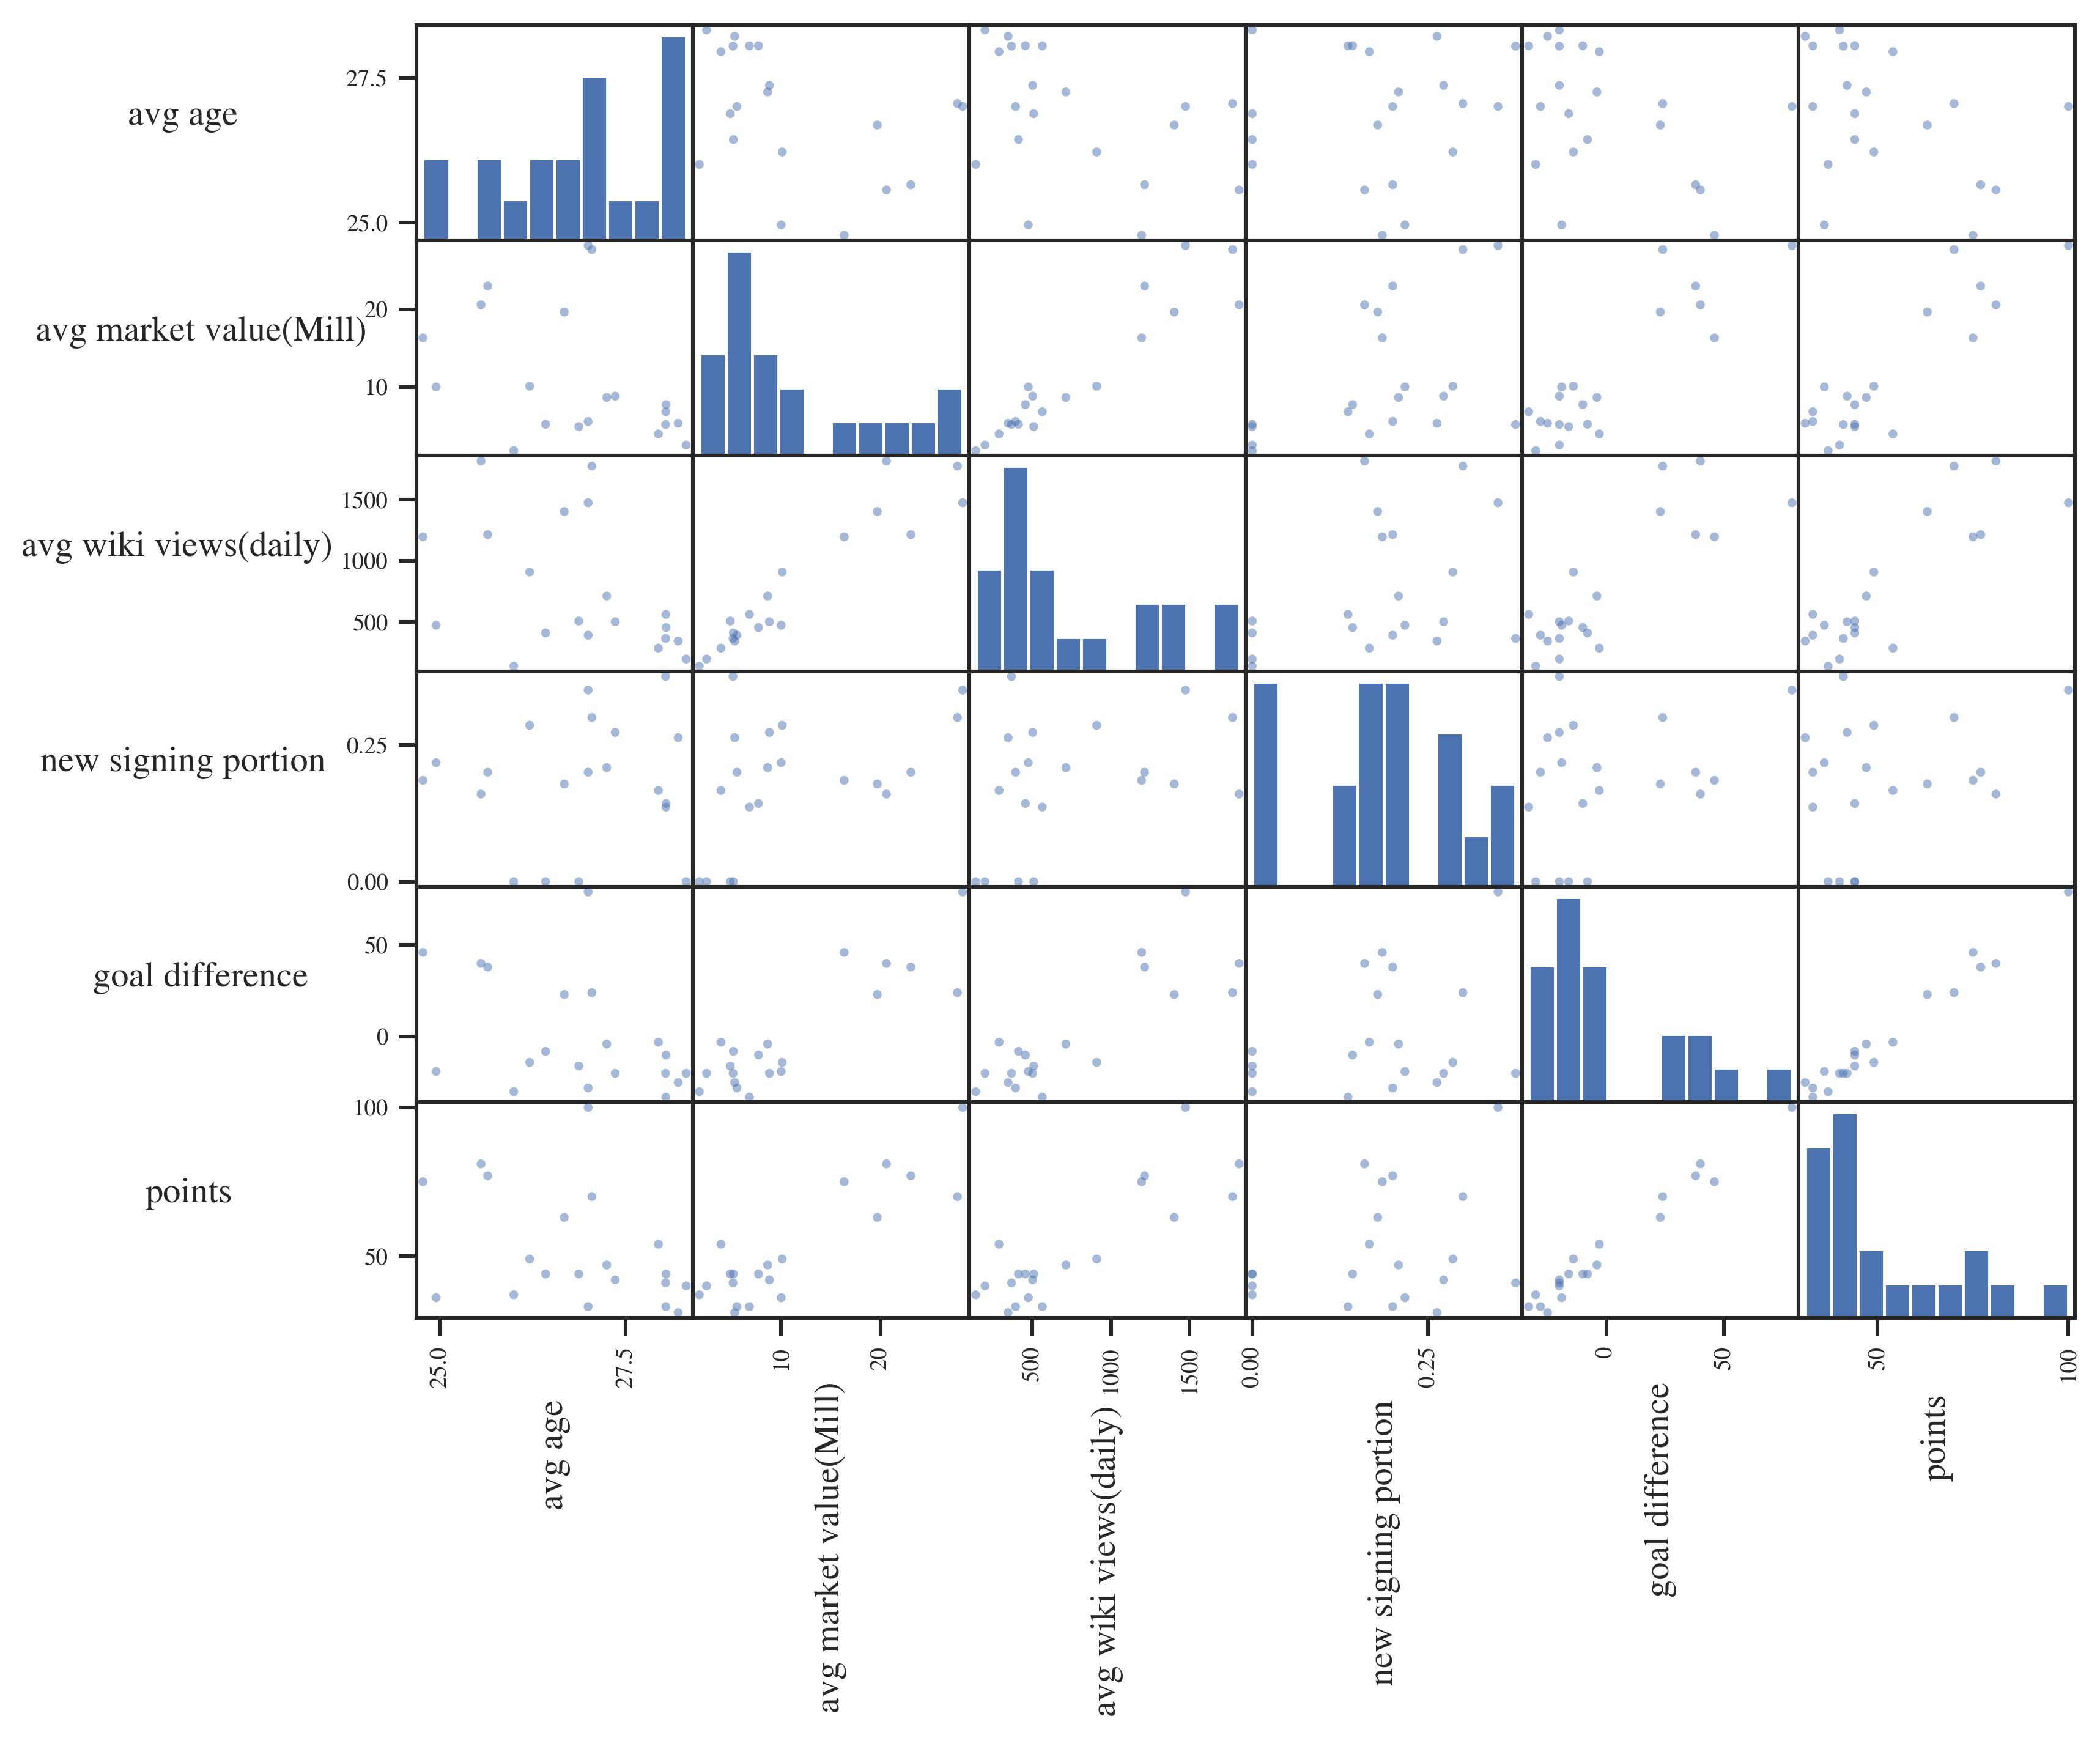

In [82]:
axs = pd.plotting.scatter_matrix(club_mean_merge_df[["avg age", "avg market value(Mill)", "avg wiki views(daily)", "new signing portion", "goal difference", "points"]], diagonal="hist")
n = 6
for x in range(n):
    for y in range(n):
        # To get the axis of subplots
        ax = axs[x, y]
        # To make x axis labels horizontal
        ax.xaxis.label.set_rotation(90)
        # To make y axis labels horizontal
        ax.yaxis.label.set_rotation(0)
        # To make sure y labels are outside the plot
        ax.yaxis.labelpad = 55
    

### Observations from above scatter matrices
---
1. The age feature doesn't have a clear pattern with other features.
2. The daily wiki page views has a clearly positive linear relationship with the average market value a club has. This relationship also exists between the market value and the points, the market value and the points.
3. The higher goal difference a club can achieve, the more points they can get.

---
Let's take a look at the correlations to help use understanding the scatter matrices plot more numerically. The red colour outstanding the strong correlations greater than 0.8 or less than -0.8.

In [83]:
def color_strong_corr_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for strong correlations
    , black otherwise.
    """
    color = 'red' if (val > 0.8 or val < -0.8)  else 'black'
    return 'color: %s' % color

In [84]:
club_mean_merge_df.corr().style.applymap(color_strong_corr_red)

,avg age,avg market value(Mill),avg wiki views(daily),new foreign portion,big club,new signing portion,won,drawn,lost,goals,goals against,goal difference,points,rank
avg age,1,-0.391928,-0.428453,-0.0721289,-0.465677,0.0677746,-0.377217,0.123741,0.438132,-0.375706,0.398461,-0.416139,-0.398927,0.402136
avg market value(Mill),-0.391928,1,0.942572,0.575935,0.922376,0.477215,0.886439,-0.661063,-0.8316,0.868862,-0.721141,0.881448,0.882863,-0.776184
avg wiki views(daily),-0.428453,0.942572,1,0.564841,0.915428,0.386011,0.860876,-0.672241,-0.791448,0.817313,-0.695827,0.836209,0.852944,-0.800081
new foreign portion,-0.0721289,0.575935,0.564841,1,0.445539,0.751306,0.442497,-0.510595,-0.318555,0.468225,-0.279046,0.430751,0.414084,-0.311667
big club,-0.465677,0.922376,0.915428,0.445539,1,0.277506,0.898125,-0.649506,-0.853402,0.868068,-0.784687,0.906576,0.89749,-0.794719
new signing portion,0.0677746,0.477215,0.386011,0.751306,0.277506,1,0.317714,-0.261129,-0.285123,0.389616,-0.124473,0.314922,0.312865,-0.220763
won,-0.377217,0.886439,0.860876,0.442497,0.898125,0.317714,1,-0.750646,-0.935518,0.925253,-0.861238,0.976338,0.995244,-0.924612
drawn,0.123741,-0.661063,-0.672241,-0.510595,-0.649506,-0.261129,-0.750646,1,0.46883,-0.620015,0.555243,-0.645411,-0.682713,0.642072
lost,0.438132,-0.8316,-0.791448,-0.318555,-0.853402,-0.285123,-0.935518,0.46883,1,-0.905439,0.85449,-0.960154,-0.965483,0.892787
goals,-0.375706,0.868862,0.817313,0.468225,0.868068,0.389616,0.925253,-0.620015,-0.905439,1,-0.684296,0.955642,0.93184,-0.84261


### Observations from correlation table:
---
1. Big club(top 6 market values) do have strong relationship with multiple features: popularity(wiki views), higher goal difference, and likely to have more points.
2. Surprisingly the portion of new signing doesn't affect the points much.
3. Further prove the observation we gained from scatter matrices that people love the club with higher market values.

## How much the market value affect the standing table
A obvious way to know which club has done a good job is through the points in standing table, which the greatest points club wins the champion.

Through the big picture observation we gain from the last section, we know there is a correlation between market values a club has and the points it gets at the end of the season. However, how much is the effect of market values a club has towards the ranking they achieve needs more investigations.

In [29]:
sorted_market_value_idx = premier_league_df.groupby(["club"])["market value(Mill)"].mean().sort_values(ascending=False).index

In [30]:
# Keep the rank
pl_1718_table_df["rank"] = pl_1718_table_df.index
# Reorder the table by market valur
rank_se = pl_1718_table_df.set_index(keys="club").reindex(sorted_market_value_idx)["rank"]

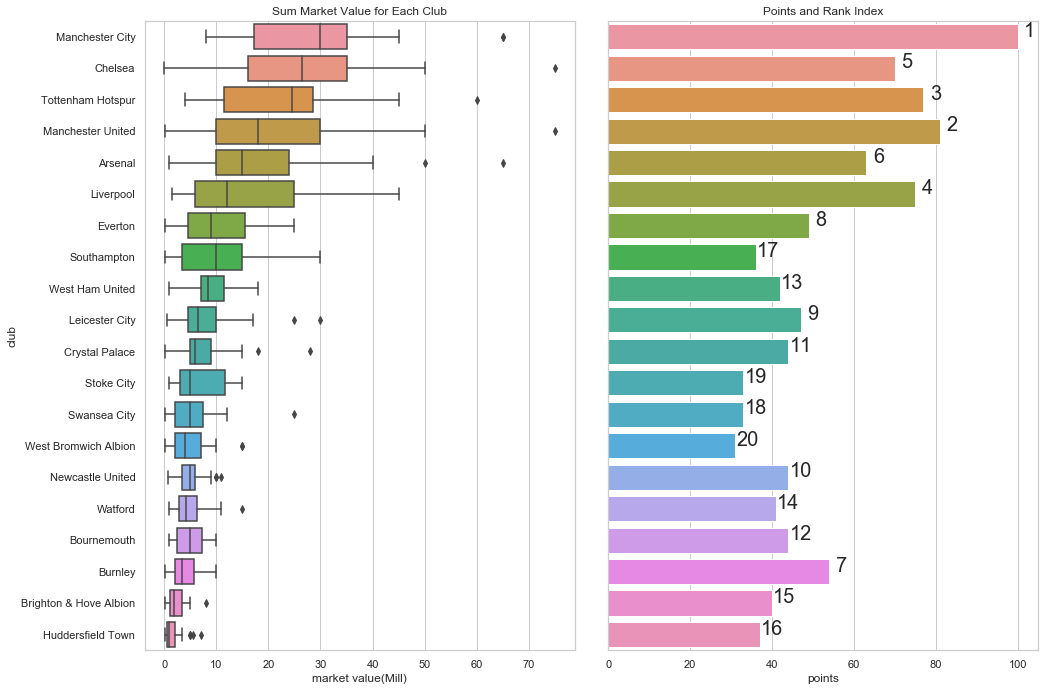

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


# plot_beautify(ax1)
# plot_beautify(ax2)

sns.boxplot(x="market value(Mill)", y="club", data=premier_league_df, order=sorted_market_value_idx, ax=ax1, )
sns.barplot(x="points", y="club", data=pl_1718_table_df, ax=ax2, order=sorted_market_value_idx)

for p, rank in zip(ax2.patches, rank_se):
    width = p.get_width()
    ax2.text(width + 3,
             p.get_y() + p.get_height()/2.0,
             rank,
             ha="center"
            )
    
ax2.set_ylabel("")
ax1.set_title("Sum Market Value for Each Club")
ax2.set_title("Points and Rank Index")

f.tight_layout()

# TODO: Remove ax2 x axis number and add the points to the top of bar

As we sorted the club orders by the club mean market value, the points a club gained at the end of season is not strictly fit for the order. **Chelsea** have the second largest mean market value but only end up with fifth in the standings, even cannot join the **UEFA Champions League** next year. Same case happened on **Southampton**, with the second largest mean market value among the clubs that are not "the big 6" but end up with almost relegation standing.



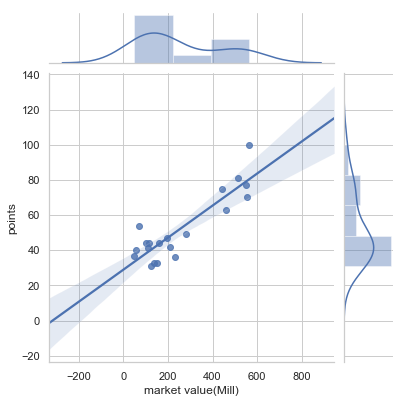

In [32]:


sns.jointplot(premier_league_df.groupby(["club"])["market value(Mill)"].sum().sort_values(ascending=False), pl_1718_table_df.set_index(keys="club").reindex(sorted_market_value_idx)["points"], kind="reg")
# plt.title("The relation betweent new assigning investment and points")

From the join plot we can have the two observations:
1. The more total market values a club has, the more the points they will gain at the end of season
2. Premier league is clearly divided into two groups by the total market values a club has, one is the **big 6 clubs** and the other one is the rest of clubs which the market values are less than or around 300 million euro

In [33]:
big_6_index = pl_1718_table_df.set_index(keys="club").reindex(sorted_market_value_idx).index[:6]

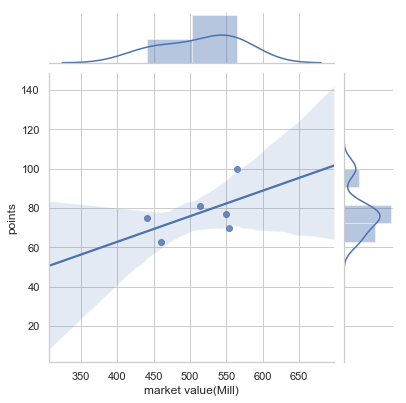

In [34]:

sns.jointplot(premier_league_df[premier_league_df["big club"] == True].groupby(["club"])["market value(Mill)"].sum().sort_values(ascending=False), pl_1718_table_df.set_index(keys="club").reindex(sorted_market_value_idx).loc[big_6_index, "points"], kind="reg")
# plt.title("The relation betweent new assigning investment and points")

In [35]:
other_clubs_index = pl_1718_table_df.set_index(keys="club").reindex(sorted_market_value_idx).index[6:]

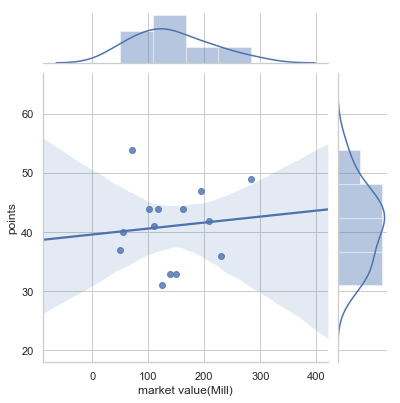

In [36]:
sns.jointplot(premier_league_df[premier_league_df["big club"] == False].groupby(["club"])["market value(Mill)"].sum().sort_values(ascending=False), pl_1718_table_df.set_index(keys="club").reindex(sorted_market_value_idx).loc[other_clubs_index, "points"], kind="reg")

The investment on market values is not so obviously reflected on the points when the club is within its own group.

## Improve the evaluation
---
Since football game can only have 11 player on field and 3 substitutes per match, sum up the all player market value in the club may not accurately demonstrate the performance of a club in a game. Next step is to sum the most expensive 14 players each club.

In [37]:
# TODO: Find a better way to demonstrate table, trim the noise columns
premier_league_df.sort_values(["club", "market value(Mill)"], ascending=[True, False]).groupby("club").head(14).groupby("club").mean().sort_values(by="market value(Mill)",ascending=False)

,age,market value(Mill),wiki views(daily),fpl value,fpl points,new foreign,big club,new signing
club,,,,,,,,
Chelsea,26.857143,35.571429,2196.214286,7.035714,127.000000,0.071429,1.0,0.285714
Manchester City,25.857143,35.500000,1684.285714,7.428571,93.000000,0.142857,1.0,0.428571
Manchester United,24.785714,31.285714,2345.000000,6.714286,92.285714,0.071429,1.0,0.285714
Arsenal,26.285714,29.928571,1942.642857,7.250000,98.071429,0.071429,1.0,0.142857
Tottenham Hotspur,25.928571,29.714286,1531.071429,7.000000,122.285714,0.000000,1.0,0.214286
Liverpool,26.357143,26.000000,1606.428571,6.928571,109.428571,0.071429,1.0,0.285714
Everton,26.428571,16.428571,1239.214286,6.142857,76.857143,0.142857,0.0,0.357143
Southampton,25.571429,14.785714,669.285714,5.607143,79.500000,0.000000,0.0,0.214286
Leicester City,26.714286,12.500000,945.000000,5.892857,74.071429,0.071429,0.0,0.357143


New signing can represent the ambition of a club for new season.

In [38]:
new_signing_df = premier_league_df[(premier_league_df["new signing"] == True) | (premier_league_df["new foreign"] == True)].groupby("club").mean().sort_values(by="market value(Mill)", ascending=False)[["market value(Mill)", "new signing", "age", "wiki views(daily)"]]

In [39]:
sorted_index = new_signing_df.index
# Reorder the table by market valur
rank_se = pl_1718_table_df.set_index(keys="club").reindex(sorted_index)["rank"]

In [40]:
new_signing_merge_df = pd.merge(new_signing_df.reset_index(), pl_1718_table_df, on="club").drop(["new signing", "played"], axis=1)

### Plotting the new signing multivariate data
---
Firstly plot the multivariate date to gain a big picture of the relationship between different features.

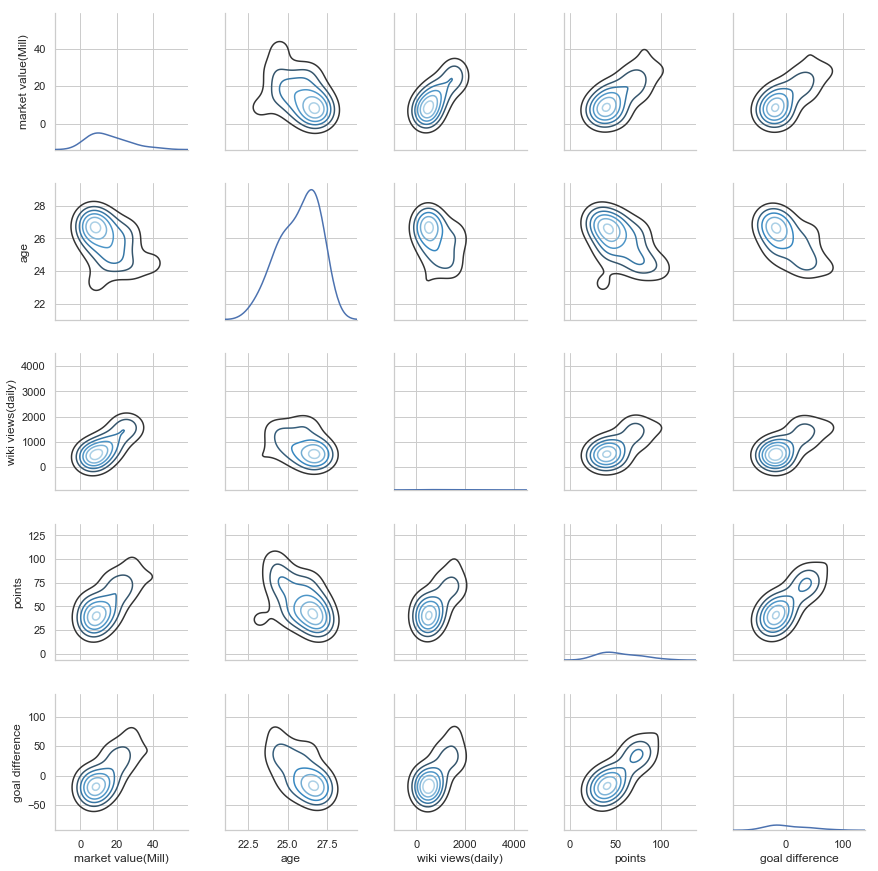

In [41]:
g = sns.PairGrid(new_signing_merge_df[["market value(Mill)", "age", "wiki views(daily)", "points", "goal difference"]])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

From the above plot we can see couple of interesting facts:
* even as the age increasing the market value will drop, but the relationship is not that strong as we expected.
* The popularity of new signing player which reflected by their wikipedia page views, booming rapidly as their market values increasing.
* There is a strong positive relationship between goal difference and points a club gained at the end of season. The reason **Manchester City** reached a historical high points(100 points) is due to their surprising goal difference.

_Note: Goal difference is the difference between the goals and the goal against a club has_

In [42]:
new_signing_merge_df.head()

,club,market value(Mill),age,wiki views(daily),won,drawn,lost,goals,goals against,goal difference,points,rank
0,Manchester United,40.500000,24.500000,3321.250000,25,6,7,68,28,40,81,2
1,Manchester City,28.571429,24.142857,1578.714286,32,4,2,106,27,79,100,1
2,Liverpool,26.300000,26.400000,1560.800000,21,12,5,84,38,46,75,4
3,Chelsea,23.508333,25.833333,1700.833333,21,7,10,62,38,24,70,5
4,Arsenal,21.400000,24.800000,1279.800000,19,6,13,74,51,23,63,6


In [43]:
new_signing_merge_df.corr()

,market value(Mill),age,wiki views(daily),won,drawn,lost,goals,goals against,goal difference,points,rank
market value(Mill),1.000000,-0.435985,0.965555,0.836080,-0.636070,-0.791584,0.785858,-0.750330,0.833588,0.834002,-0.782822
age,-0.435985,1.000000,-0.364576,-0.472179,0.286022,0.486445,-0.518388,0.379650,-0.502201,-0.481745,0.404011
wiki views(daily),0.965555,-0.364576,1.000000,0.747625,-0.611647,-0.684763,0.633468,-0.718458,0.718923,0.739477,-0.688612
won,0.836080,-0.472179,0.747625,1.000000,-0.773377,-0.939998,0.924339,-0.872534,0.976339,0.995665,-0.923931
drawn,-0.636070,0.286022,-0.611647,-0.773377,1.000000,0.510684,-0.657301,0.553760,-0.666700,-0.711064,0.643757
lost,-0.791584,0.486445,-0.684763,-0.939998,0.510684,1.000000,-0.899856,0.885320,-0.965321,-0.967656,0.906591
goals,0.785858,-0.518388,0.633468,0.924339,-0.657301,-0.899856,1.000000,-0.700081,0.955424,0.928778,-0.837127
goals against,-0.750330,0.379650,-0.718458,-0.872534,0.553760,0.885320,-0.700081,1.000000,-0.879692,-0.886509,0.807268
goal difference,0.833588,-0.502201,0.718923,0.976339,-0.666700,-0.965321,0.955424,-0.879692,1.000000,0.985073,-0.891273
points,0.834002,-0.481745,0.739477,0.995665,-0.711064,-0.967656,0.928778,-0.886509,0.985073,1.000000,-0.930312


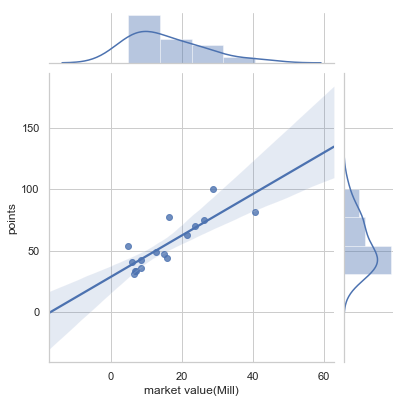

In [44]:
sns.jointplot(new_signing_df["market value(Mill)"], pl_1718_table_df.set_index(keys="club").reindex(sorted_index)["points"], kind="reg")
# plt.title("The relation betweent new assigning investment and points")

From the regression function we see above there is a relationship between the new signing investment and points they 

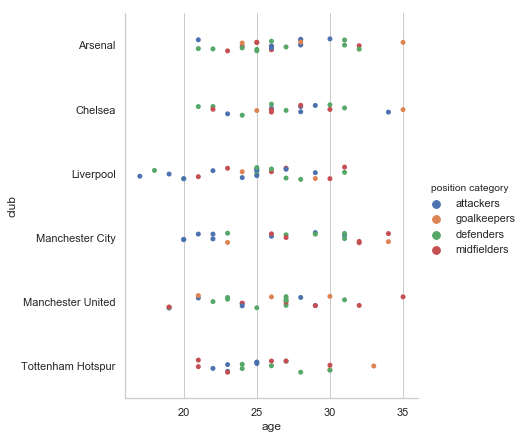

In [45]:
sns.catplot(x="age", y="club", data=premier_league_df[premier_league_df["big club"] == True], hue="position category", height=6.5)

**Liverpool** has many young players, which give the Liverpool the potential of future mark values. As the positive relationship between market values and the standings of a club, **Liverpool** is likely to have a good rank in the future premier league.

### Which position has the largest average market value and popularity
---
Is the market value normally distributed among all the position in the premier league. Which position is the most popular one and which position is dying?

<img src="source/association_football_position.png" width=400>

In [55]:
position_mean_order_idx = premier_league_df.groupby("position").mean().sort_values("market value(Mill)", ascending=False).index

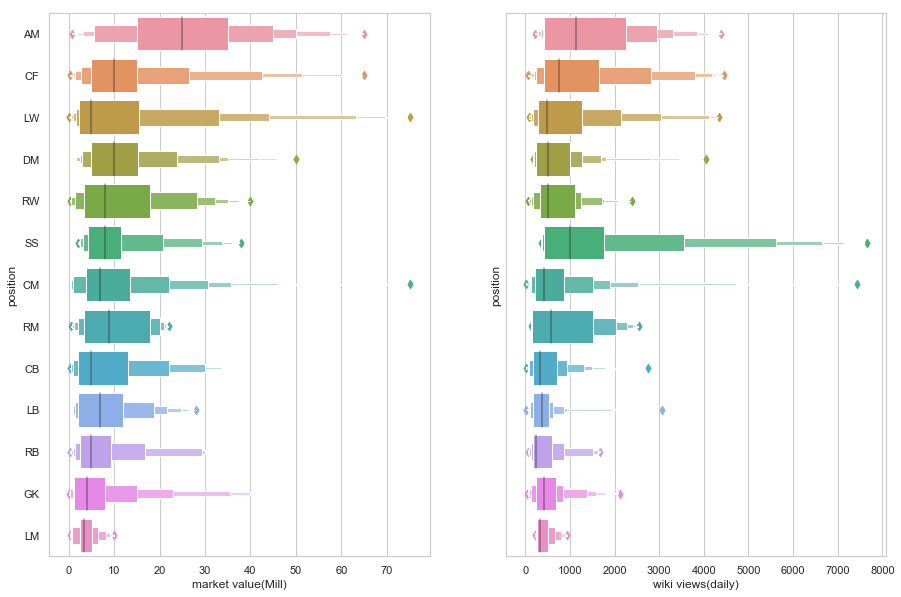

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

sns.boxenplot(x="market value(Mill)", y="position", data=premier_league_df, ax=ax1, order=position_mean_order_idx)
sns.boxenplot(x="wiki views(daily)", y="position", data=premier_league_df, ax=ax2, order=position_mean_order_idx)

* It is surprised that `left midfield(LM)` is the dying position in the 17/18 premier league. The players in that position has a surprising low market value median and the even sadder wikipedia views.
* `Second striker(SS)` is the favorite of the football fans. The daily wikipedia views for the player at that position is outstanding from the others.
* `Attacking midfield(AM)` the most valuable position in the premier league. The big chunk of players have arrange from 15 millions euro to 35 millions euro market value.

Let's see who is the favorite `second striker(SS)` in premier league

In [57]:
premier_league_df[premier_league_df["position"] == "SS"].sort_values("wiki views(daily)", ascending=False).head(1)

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,nationality,new foreign,big club,new signing
143,Wayne Rooney,Everton,31,SS,attackers,15.0,7664,7.5,20.90%,76,England,England,False,False,False


It is the record goalscorer for the England national team and for Manchester United, Wayne Rooney.

<img src="source/wayne_rooney.jpg">

### The histogram of different different position categories

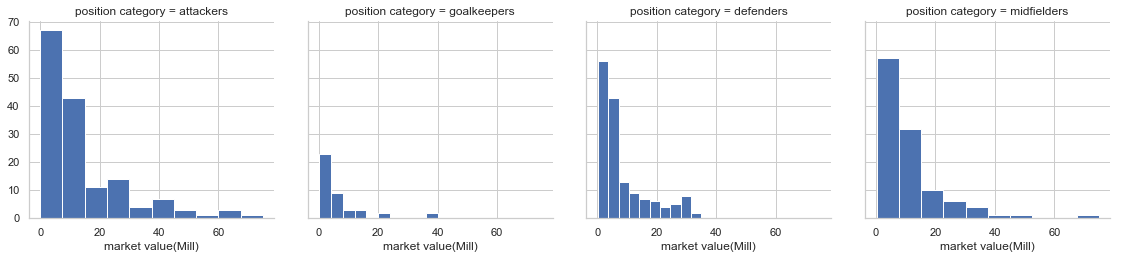

In [58]:
g = sns.FacetGrid(premier_league_df, col="position category", height=4)
g.map(plt.hist, "market value(Mill)")

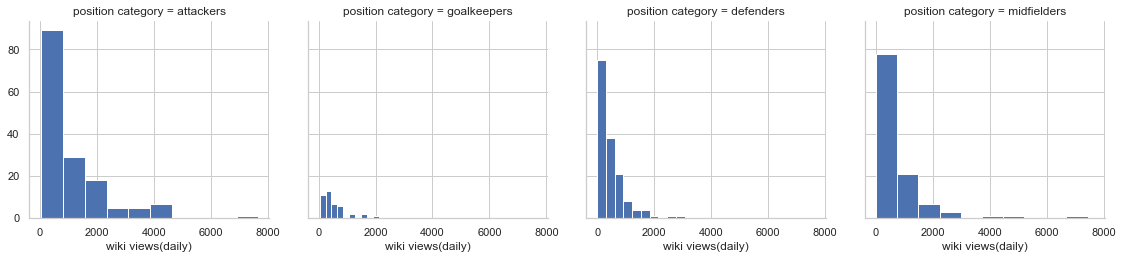

In [59]:
g = sns.FacetGrid(premier_league_df, col="position category", height=4)
g.map(plt.hist, "wiki views(daily)")

Attackers are the most valuable and popular position category in the premier league. On the contrary, the goal keepers are barely under the spotlight.

In [60]:
premier_league_df[premier_league_df["position category"] == "goalkeepers"].sort_values("market value(Mill)", ascending=False).head(3)

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,nationality,new foreign,big club,new signing
261,David de Gea,Manchester United,26,GK,goalkeepers,40.0,2126,5.5,26.10%,136,EU,Spain,False,True,False
98,Thibaut Courtois,Chelsea,25,GK,goalkeepers,40.0,1260,5.5,18.50%,141,EU,Belgium,False,True,False
380,Hugo Lloris,Tottenham Hotspur,30,GK,goalkeepers,24.0,847,5.5,12.60%,143,EU,France,False,True,False


The best two goalkeepers in premier league only has 40 millions euro value at 17/18 season.

In [65]:
premier_league_df.groupby("nationality").count().sort_values("name", ascending=False).head(10)

,name,club,age,position,position category,market value(Mill),wiki views(daily),fpl value,fpl select(%),fpl points,region category,new foreign,big club,new signing
nationality,,,,,,,,,,,,,,
England,156,156,156,156,156,156,156,156,156,156,156,156,156,156
Spain,28,28,28,28,28,28,28,28,28,28,28,28,28,28
France,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Netherlands,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Belgium,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Ireland,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Argentina,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Germany,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Scotland,14,14,14,14,14,14,14,14,14,14,14,14,14,14
